## 문자를 이용한 딥러닝 실습 보고서 제출 
**학번 : 201711370 /**
**이름 : 이혜민 (정보보호)**


1. Tensorflow가 제공하는 imdb 데이터 불러오기

In [ ]:
# 텐서플로가 제공하는 imdb 데이터 불러오기 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing

dic_size = 10000 # 사전의 크기 (사전에 있는 단어 개수)
sample_size = 512

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_size)
print(x_train.shape, x_test.shape)
print(x_train[0])

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 

In [ ]:
# 단어를 숫자, 숫자를 단어로 변환하는데 사용하는 표 (표는 dictionary로 구현)
word2id = imdb.get_word_index()
id2word = {word:id for id, word in word2id.items()}

for i in range(1, 21):
  print(id2word[i], end='/')

1654784/1641221 [==============================] - 0s 0us/step
the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

2. 학습에 필요한 하이퍼 파라미터 값 설정 

- sample_size : 256
- epochs : 10, 20, 30
- batch_size : 64, 128
- validation_split : 0.2 / 0.3 / 0.4

In [5]:
# 파라미터 값 for문으로 자동으로 돌아가도록 설정

parameters =[] # list of (sample_size, epochs, batch_size, validation_split)
for s in [256]:
  for e in [10,20,30]:
    for b in [64, 128]:
      for v in [0.2,0.3,0.4]:
        parameters.append((s,e,b,v))

3. 단어 임베딩을 사용하여 IMDB 데이터를 부정/긍정으로 평가 분류하는 학습 모델 

In [6]:
# 단어 임베딩을 사용하여 IMDB 데이터를 부정/ 긍정으로 평가 분류하는 학습 모델

# 텐서플로가 제공하는 imdb 데이터 불러오기 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing

def training1(ssize, eps, bsize, vsplit):
  dic_size = 10000 # 사전의 크기 (사전에 있는 단어 개수)
  sample_size = ssize

  # tensorflow가 제공하는 간소한 버전의 IMDB 읽기
  (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_size)

  # 16차원의 임베딩 공간
  embed_space_dim = 16

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_size)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_size)


  # 신경망 모델의 설계와 학습 (LSTM층 포함)
  embed = Sequential()
  embed.add(Embedding(input_dim=dic_size, output_dim=embed_space_dim, input_length=sample_size))
  embed.add(Flatten())
  embed.add(Dense(32,activation='relu'))
  embed.add(Dense(1,activation='sigmoid'))
  embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
  hist = embed.fit(x_train, y_train, epochs=eps, batch_size=bsize, validation_split=vsplit, 
                   verbose=2)

  return embed, hist

def evaluate1(embed):
# 모델 평가
  res = embed.evaluate(x_test, y_test, verbose=0)
  #print("Accuracy:", res[1]*100)
  return res

def trainingcurve(hist):
  # 학습 곡선
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='best')
  plt.grid()
  plt.show()


In [7]:
# 각 파라미터별로 학습 후, models1(dictionary에)에 저장
models1 = {}

for parameter in parameters:
  embed, hist = training1(parameter[0], parameter[1], parameter[2], parameter[3])
  models1[parameter] = (embed, hist)

Epoch 1/10
313/313 - 3s - loss: 0.4814 - accuracy: 0.7419 - val_loss: 0.3024 - val_accuracy: 0.8728 - 3s/epoch - 9ms/step
Epoch 2/10
313/313 - 2s - loss: 0.1774 - accuracy: 0.9360 - val_loss: 0.2982 - val_accuracy: 0.8770 - 2s/epoch - 6ms/step
Epoch 3/10
313/313 - 2s - loss: 0.0547 - accuracy: 0.9873 - val_loss: 0.3453 - val_accuracy: 0.8760 - 2s/epoch - 6ms/step
Epoch 4/10
313/313 - 2s - loss: 0.0132 - accuracy: 0.9985 - val_loss: 0.4046 - val_accuracy: 0.8730 - 2s/epoch - 6ms/step
Epoch 5/10
313/313 - 2s - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.4416 - val_accuracy: 0.8750 - 2s/epoch - 6ms/step
Epoch 6/10
313/313 - 2s - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.4659 - val_accuracy: 0.8718 - 2s/epoch - 6ms/step
Epoch 7/10
313/313 - 2s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.8732 - 2s/epoch - 6ms/step
Epoch 8/10
313/313 - 2s - loss: 6.6081e-04 - accuracy: 1.0000 - val_loss: 0.5090 - val_accuracy: 0.8706 - 2s/epoch - 5ms/step
Epoch 9/10
313/313 -

[ 1 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.2
정확률:  86.65 %


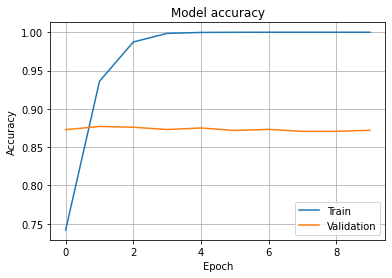

[ 2 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.3
정확률:  86.57 %


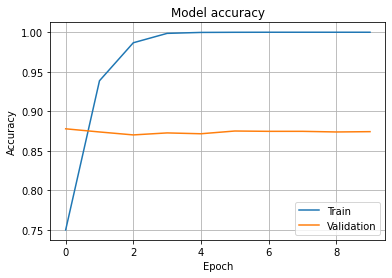

[ 3 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.4
정확률:  86.45 %


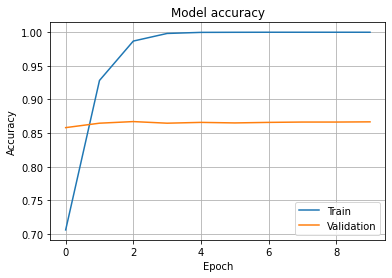

[ 4 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.2
정확률:  86.75 %


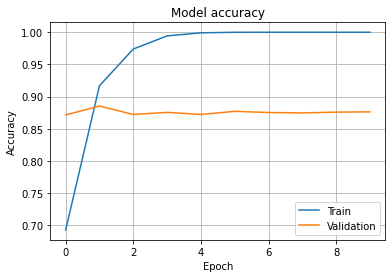

[ 5 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.3
정확률:  86.49 %


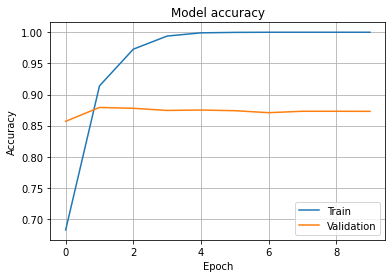

[ 6 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.4
정확률:  86.59 %


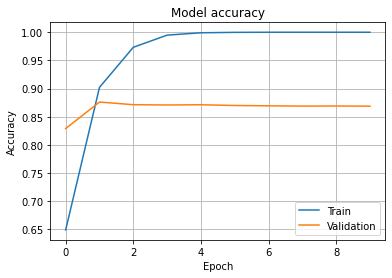

[ 7 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.2
정확률:  86.76 %


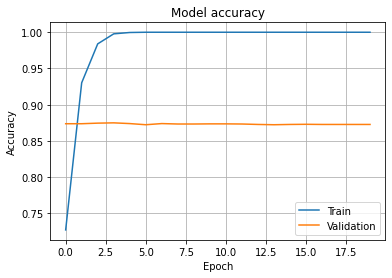

[ 8 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.3
정확률:  86.48 %


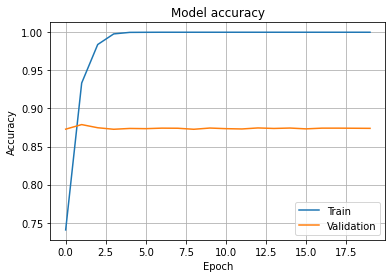

[ 9 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.4
정확률:  86.21 %


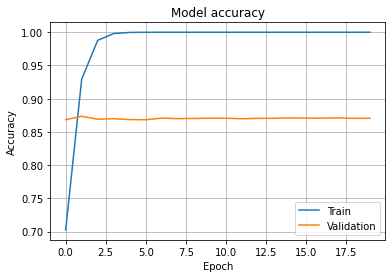

[ 10 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.2
정확률:  86.57 %


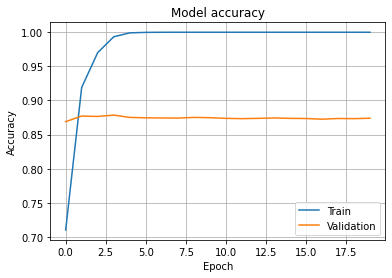

[ 11 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.3
정확률:  86.4 %


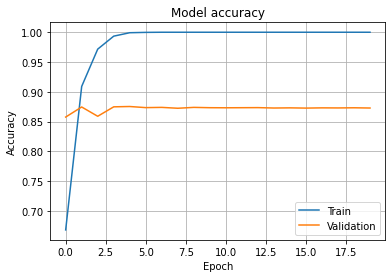

[ 12 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.4
정확률:  86.21 %


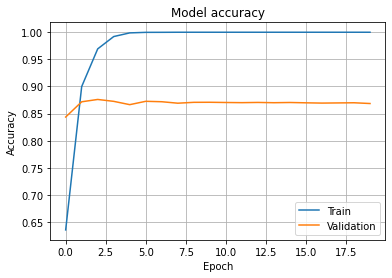

[ 13 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.2
정확률:  86.63 %


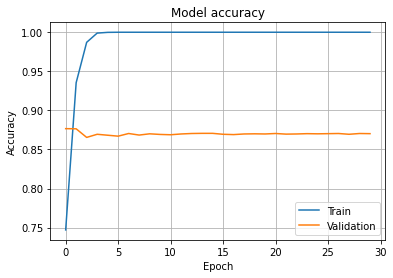

[ 14 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.3
정확률:  86.24 %


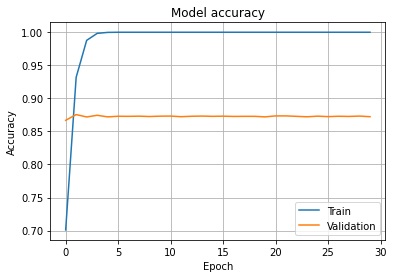

[ 15 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.4
정확률:  86.2 %


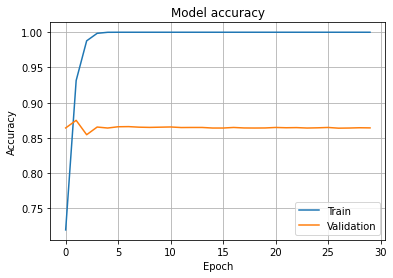

[ 16 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.2
정확률:  86.71 %


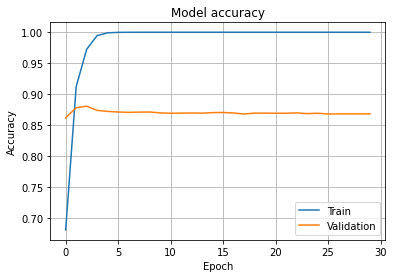

[ 17 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.3
정확률:  86.38 %


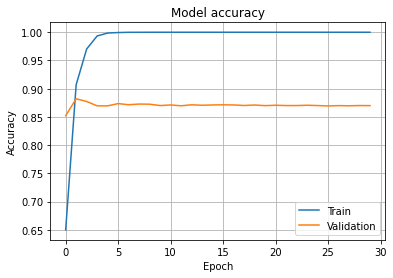

[ 18 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.4
정확률:  86.39 %


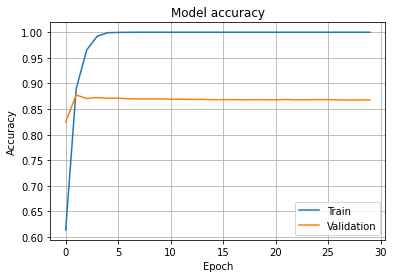

In [8]:
# 모델 Accuracy 결과 출력
cnt = 0
for parameter in parameters:
  cnt += 1
  embed, hist = models1[parameter]
  res = evaluate1(embed)
  print( "[",cnt,"]"," sample_size:",parameter[0]," epochs:", parameter[1]," batch_size:",parameter[2], " validation_split:", parameter[3])
  print("정확률: ", round(res[1]*100,2),"%")
  trainingcurve(hist)

4. 단어 임베딩을 사용하여 IMDB 데이터를 부정/긍정으로 평가 분류하는 **LSTM** 신경망 학습

In [9]:
# 단어 임베딩을 사용하여 IMDB 데이터를 부정/ 긍정으로 평가 분류하는 LSTM 신경망 학습
# 텐서플로가 제공하는 imdb 데이터 불러오기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

def training2(ssize, eps, bsize, vsplit):
  dic_size = 10000 # 사전의 크기 (사전에 있는 단어 개수)
  sample_size = ssize

  # tensorflow가 제공하는 간소한 버전의 IMDB 읽기
  (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_size)

  # 16차원의 임베딩 공간
  embed_space_dim = 16

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_size)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_size)

  early = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

  # 신경망 모델의 설계와 학습 (LSTM층 포함)
  embed = Sequential()
  embed.add(Embedding(input_dim=dic_size, output_dim=embed_space_dim, input_length=sample_size))
  embed.add(LSTM(units=32))
  embed.add(Dense(1,activation='sigmoid'))
  embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
  hist = embed.fit(x_train, y_train, epochs=eps, batch_size=bsize, validation_split=vsplit, 
                   verbose=2, callbacks=[early])
  
  return embed, hist

# 모델 평가
def evaluate2(embed):
  res = embed.evaluate(x_test, y_test, verbose=0)
  #print("정확률은", res[1]*100)
  return res

# 학습 곡선
def trainingcurve(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='best')
  plt.grid()
  plt.show()


In [10]:
# 각 파라미터별로 학습 후, models2(dictionary에)에 저장
models2 = {}

for parameter in parameters:
  embed, hist = training2(parameter[0], parameter[1], parameter[2], parameter[3])
  models2[parameter] = (embed, hist)

Epoch 1/10
313/313 - 16s - loss: 0.4522 - accuracy: 0.7815 - val_loss: 0.3081 - val_accuracy: 0.8720 - 16s/epoch - 51ms/step
Epoch 2/10
313/313 - 13s - loss: 0.2440 - accuracy: 0.9060 - val_loss: 0.3133 - val_accuracy: 0.8684 - 13s/epoch - 42ms/step
Epoch 3/10
313/313 - 13s - loss: 0.1861 - accuracy: 0.9333 - val_loss: 0.2984 - val_accuracy: 0.8702 - 13s/epoch - 42ms/step
Epoch 4/10
313/313 - 13s - loss: 0.1443 - accuracy: 0.9498 - val_loss: 0.3255 - val_accuracy: 0.8732 - 13s/epoch - 41ms/step
Epoch 5/10
313/313 - 13s - loss: 0.1081 - accuracy: 0.9642 - val_loss: 0.3452 - val_accuracy: 0.8706 - 13s/epoch - 42ms/step
Epoch 6/10
313/313 - 13s - loss: 0.0900 - accuracy: 0.9718 - val_loss: 0.3835 - val_accuracy: 0.8686 - 13s/epoch - 41ms/step
Epoch 7/10
313/313 - 13s - loss: 0.0755 - accuracy: 0.9760 - val_loss: 0.4596 - val_accuracy: 0.8706 - 13s/epoch - 41ms/step
Epoch 8/10
313/313 - 13s - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.4426 - val_accuracy: 0.8642 - 13s/epoch - 41ms/step


[ 1 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.2
정확률:  86.82 %


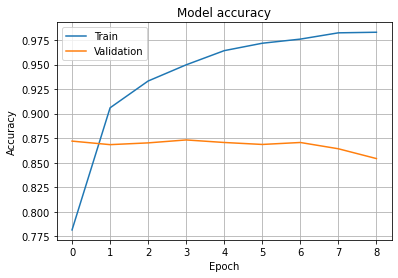

[ 2 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.3
정확률:  87.34 %


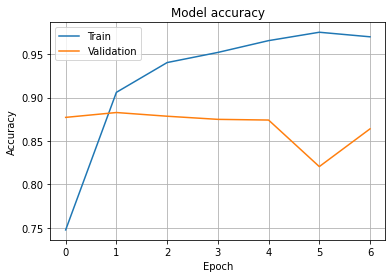

[ 3 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.4
정확률:  86.35 %


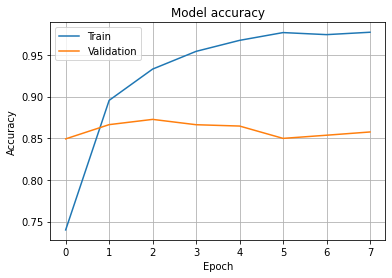

[ 4 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.2
정확률:  87.54 %


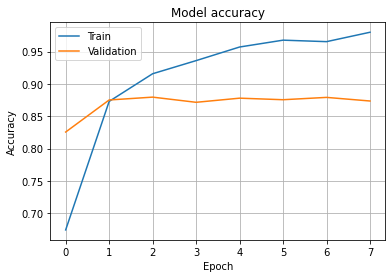

[ 5 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.3
정확률:  87.15 %


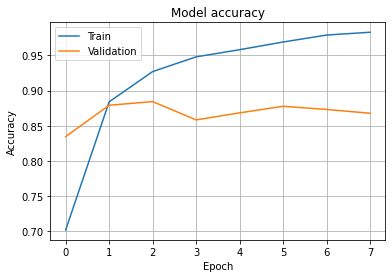

[ 6 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.4
정확률:  86.39 %


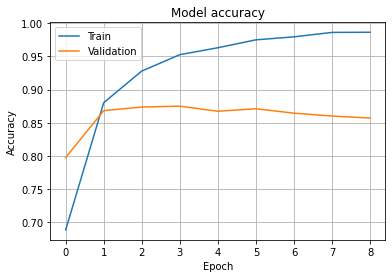

[ 7 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.2
정확률:  87.01 %


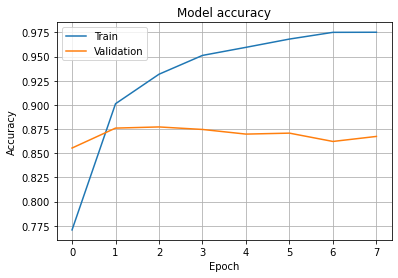

[ 8 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.3
정확률:  87.3 %


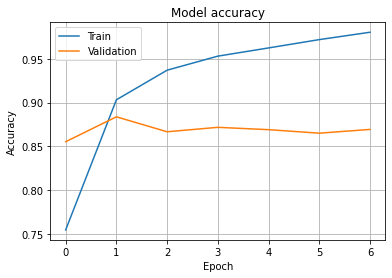

[ 9 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.4
정확률:  86.57 %


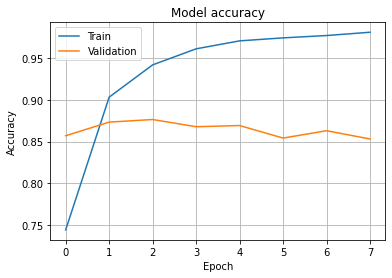

[ 10 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.2
정확률:  86.92 %


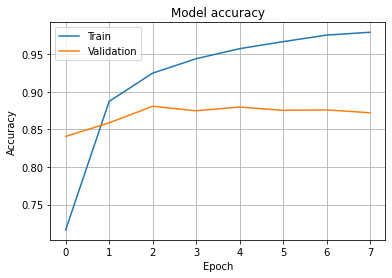

[ 11 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.3
정확률:  87.07 %


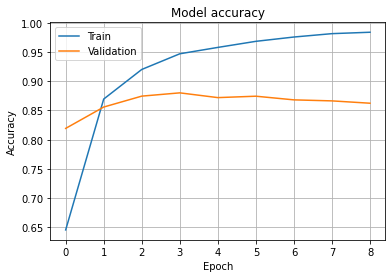

[ 12 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.4
정확률:  86.77 %


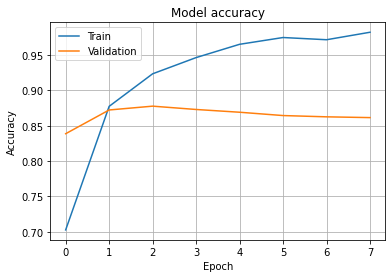

[ 13 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.2
정확률:  86.96 %


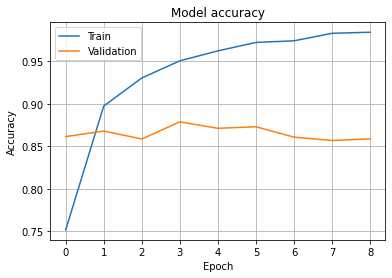

[ 14 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.3
정확률:  86.22 %


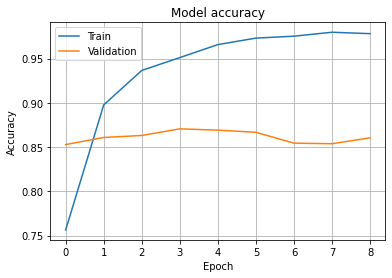

[ 15 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.4
정확률:  86.68 %


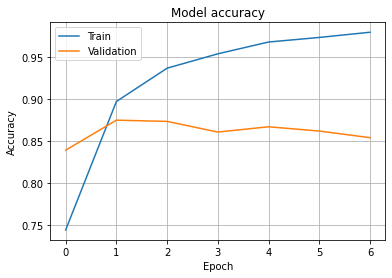

[ 16 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.2
정확률:  87.53 %


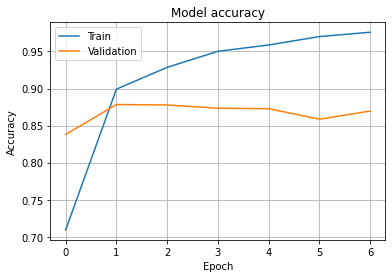

[ 17 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.3
정확률:  87.42 %


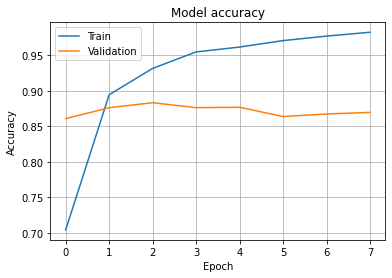

[ 18 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.4
정확률:  87.05 %


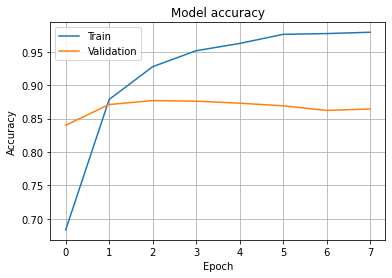

In [11]:
# 모델 Accuracy 결과 출력

cnt = 0
for parameter in parameters:
  cnt += 1
  embed, hist = models2[parameter]
  res = evaluate2(embed)
  print( "[",cnt,"]"," sample_size:",parameter[0]," epochs:", parameter[1]," batch_size:",parameter[2], " validation_split:", parameter[3])
  print("정확률: ", round(res[1]*100,2),"%")
  trainingcurve(hist)

5. LSTM의 성능 개선을 위한 unit수 조정 

In [13]:
# 단어 임베딩을 사용하여 IMDB 데이터를 부정/ 긍정으로 평가 분류하는 LSTM 신경망 학습 - Unit 128
# 텐서플로가 제공하는 imdb 데이터 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

def training2(ssize, eps, bsize, vsplit):
  dic_size = 10000 # 사전의 크기 (사전에 있는 단어 개수)
  sample_size = ssize

  # tensorflow가 제공하는 간소한 버전의 IMDB 읽기
  (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_size)

  # 16차원의 임베딩 공간
  embed_space_dim = 16

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_size)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_size)

  early = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

  # 신경망 모델의 설계와 학습 (LSTM층 포함)
  embed = Sequential()
  embed.add(Embedding(input_dim=dic_size, output_dim=embed_space_dim, input_length=sample_size))
  embed.add(LSTM(units=128))
  embed.add(Dense(1,activation='sigmoid'))
  embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
  hist = embed.fit(x_train, y_train, epochs=eps, batch_size=bsize, validation_split=
                   vsplit, verbose=2, callbacks=[early])
  
  return embed, hist

# 모델 평가
def evaluate2(embed):
  res = embed.evaluate(x_test, y_test, verbose=0)
  #print("정확률은", res[1]*100)
  return res

# 학습 곡선
def trainingcurve(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='best')
  plt.grid()
  plt.show()


# 각 파라미터별로 학습 후, models2(dictionary에)에 저장
models2 = {}

for parameter in parameters:
  embed, hist = training2(parameter[0], parameter[1], parameter[2], parameter[3])
  models2[parameter] = (embed, hist)

Epoch 1/10
313/313 - 18s - loss: 0.5159 - accuracy: 0.7300 - val_loss: 0.3534 - val_accuracy: 0.8546 - 18s/epoch - 57ms/step
Epoch 2/10
313/313 - 15s - loss: 0.3144 - accuracy: 0.8744 - val_loss: 0.3687 - val_accuracy: 0.8378 - 15s/epoch - 48ms/step
Epoch 3/10
313/313 - 15s - loss: 0.2213 - accuracy: 0.9165 - val_loss: 0.3288 - val_accuracy: 0.8668 - 15s/epoch - 48ms/step
Epoch 4/10
313/313 - 15s - loss: 0.1728 - accuracy: 0.9384 - val_loss: 0.3880 - val_accuracy: 0.8706 - 15s/epoch - 48ms/step
Epoch 5/10
313/313 - 15s - loss: 0.1468 - accuracy: 0.9474 - val_loss: 0.3646 - val_accuracy: 0.8618 - 15s/epoch - 48ms/step
Epoch 6/10
313/313 - 15s - loss: 0.1171 - accuracy: 0.9602 - val_loss: 0.4100 - val_accuracy: 0.8660 - 15s/epoch - 47ms/step
Epoch 7/10
313/313 - 15s - loss: 0.1012 - accuracy: 0.9657 - val_loss: 0.4349 - val_accuracy: 0.8558 - 15s/epoch - 47ms/step
Epoch 8/10
313/313 - 15s - loss: 0.0786 - accuracy: 0.9736 - val_loss: 0.5305 - val_accuracy: 0.8540 - 15s/epoch - 47ms/step


[ 1 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.2
정확률:  86.13 %


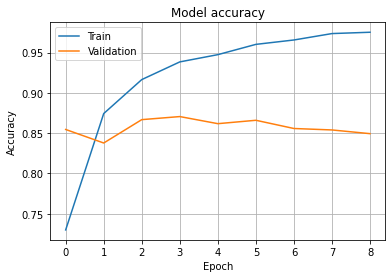

[ 2 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.3
정확률:  85.78 %


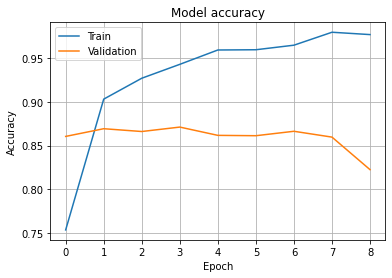

[ 3 ]  sample_size: 256  epochs: 10  batch_size: 64  validation_split: 0.4
정확률:  86.1 %


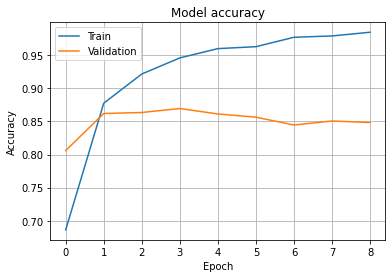

[ 4 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.2
정확률:  86.22 %


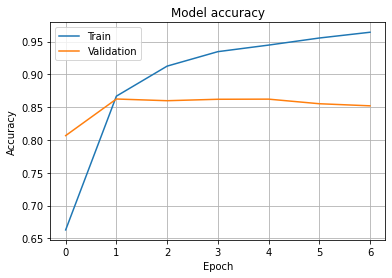

[ 5 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.3
정확률:  86.49 %


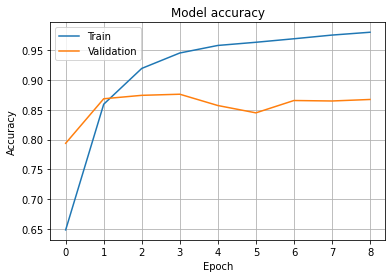

[ 6 ]  sample_size: 256  epochs: 10  batch_size: 128  validation_split: 0.4
정확률:  85.83 %


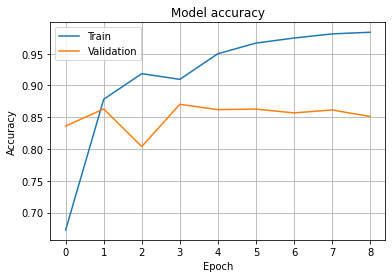

[ 7 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.2
정확률:  86.6 %


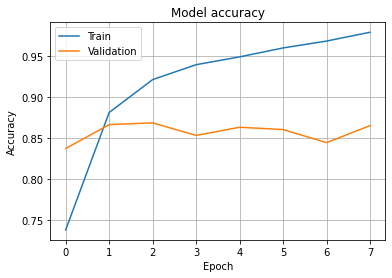

[ 8 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.3
정확률:  85.61 %


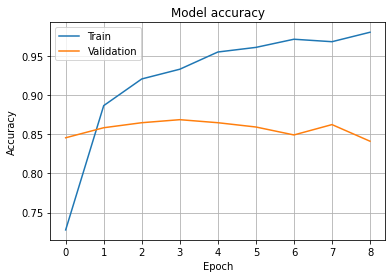

[ 9 ]  sample_size: 256  epochs: 20  batch_size: 64  validation_split: 0.4
정확률:  86.96 %


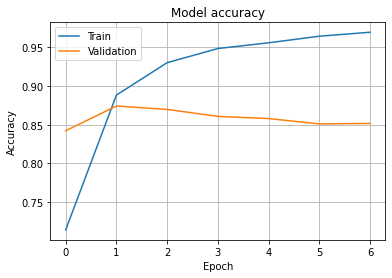

[ 10 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.2
정확률:  86.91 %


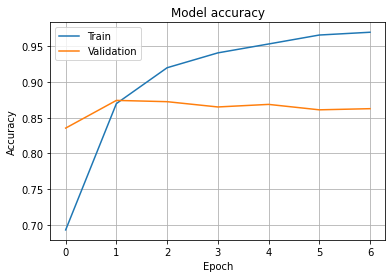

[ 11 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.3
정확률:  86.01 %


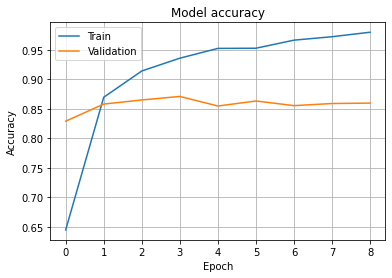

[ 12 ]  sample_size: 256  epochs: 20  batch_size: 128  validation_split: 0.4
정확률:  86.72 %


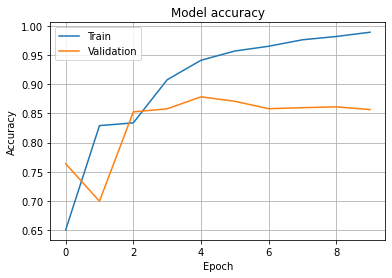

[ 13 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.2
정확률:  87.35 %


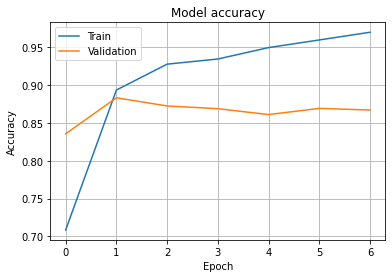

[ 14 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.3
정확률:  86.5 %


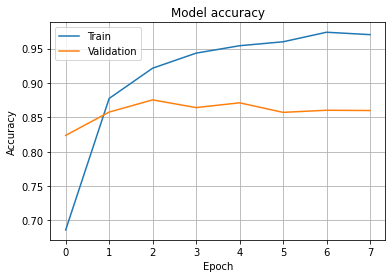

[ 15 ]  sample_size: 256  epochs: 30  batch_size: 64  validation_split: 0.4
정확률:  85.69 %


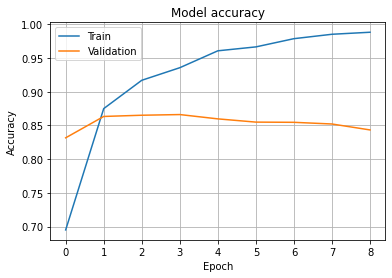

[ 16 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.2
정확률:  86.6 %


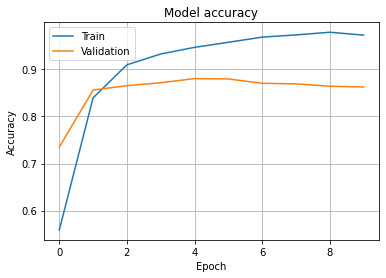

[ 17 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.3
정확률:  86.89 %


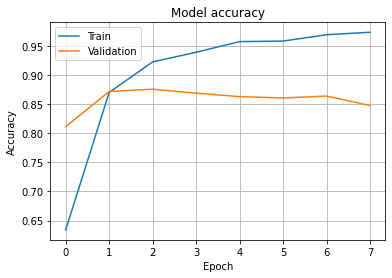

[ 18 ]  sample_size: 256  epochs: 30  batch_size: 128  validation_split: 0.4
정확률:  86.78 %


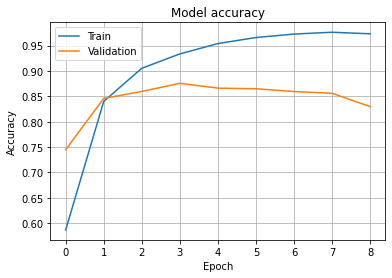

In [14]:
# 모델 Accuracy 결과 출력

cnt = 0
for parameter in parameters:
  cnt += 1
  embed, hist = models2[parameter]
  res = evaluate2(embed)
  print( "[",cnt,"]"," sample_size:",parameter[0]," epochs:", parameter[1]," batch_size:",parameter[2], " validation_split:", parameter[3])
  print("정확률: ", round(res[1]*100,2),"%")
  trainingcurve(hist)